# Data science process

## I. Data Analysis

Setting data pipeline path

In [4]:
a = os.listdir('C:/Users/My Computer/Desktop/DS projects/DSIA/Capstone project/speech recognition/data')
print(', '.join(a))

background_noise, backward, bed, bird, cat, dog, down, eight, five, follow, forward, four, go, happy, house, learn, left, marvin, nine, no, off, on, one, right, seven, sheila, six, stop, three, tree, two, up, visual, wow, yes, zero


Randomly pick a wav file from the path

In [8]:
import random
b = random.choice(a)

In [14]:
b

'two'

In [15]:
d = one['file'].sample(n=1).to_string()
e = re.findall(r'\w+.wav',d)[0]
path = path +b + '/'+e
path

'drive/My Drive/speech/two/617aeb6c_nohash_3.wav'

Lets listen to the audio file!

In [16]:
print('Audio name:',e)
dis.Audio(path)

Audio name: 617aeb6c_nohash_3.wav


##### 1.Sound Wave Form

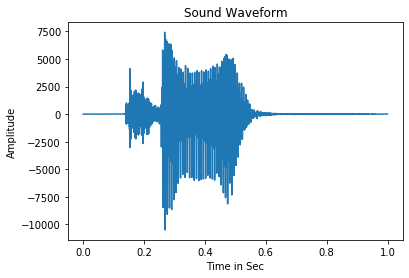

In [17]:
fs, signals = wavfile.read(path)
def plot_sine_wav(file_path):
    time = np.linspace(0, len(signals)/fs, num=len(signals))
    plt.plot(time,signals)
    plt.xlabel('Time in Sec')
    plt.ylabel('Amplitude')
    plt.title('Sound Waveform')
    plt.show()

plot_sine_wav(path)

This is a basic soundwave of the audio file, which usually consists frequency of 16K Hz

##### 2.Fast Fourier Transform (FFT)

In order to have a clearer look of audio wave file, Fast Fourier Transform is commonly used in Audio file analysis in order to check the specific audio frequency and power of spectrum. The 2 features are used to indicate if file are clean and there isn't any background noise.

First of all, let's look at the power spectrum of 'two'.

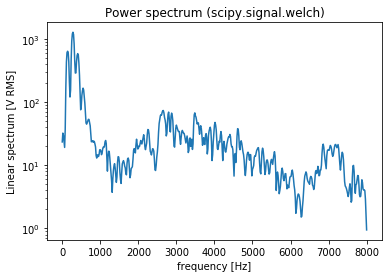

In [19]:
# signal.welch
f, Pxx_spec = signal.welch(signals, fs, 'flattop', 1024, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title('Power spectrum (scipy.signal.welch)')
plt.show()

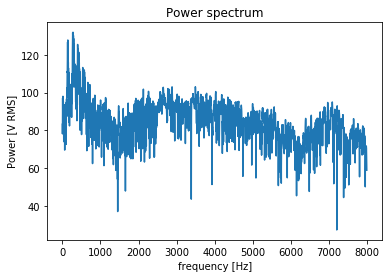

In [20]:
p = 20*np.log10(np.abs(np.fft.rfft(signals)))
f = np.linspace(0, fs/2, len(p))
plt.plot(f, p)
plt.xlabel('frequency [Hz]')
plt.ylabel('Power [V RMS]')
plt.title('Power spectrum')
plt.show()

Different library packages are used to evaluate the power spectrum. Both graphs are similar and show that the initial speech of 'two' normally has highest frequency.

In order to check if the audio contains any noises, Fast Fourier Transform is applied for digital signal processing.

In [0]:
def custom_fft(y, fs):
    T = 1.0 / fs
    N = y.shape[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    vals = 2.0/N * np.abs(yf[0:N//2])  # FFT is simmetrical, so we take just the first half
    # FFT is also complex, to we take just the real part (abs)
    return xf, vals

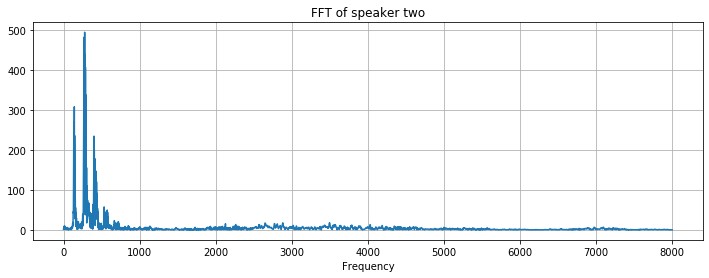

In [22]:
xf, vals = custom_fft(signals, fs)
plt.figure(figsize=(12, 4))
plt.title('FFT of speaker ' +b)
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()

The graph of FFT indicate that there isn't any background noise in the audio file as the frequency of 'two' sound is less than 1k Hz. 

##### 3. Spectrogram

In [0]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * fs / 1e3))
    noverlap = int(round(step_size * fs / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=fs,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

Text(0.5, 0, 'Seconds')

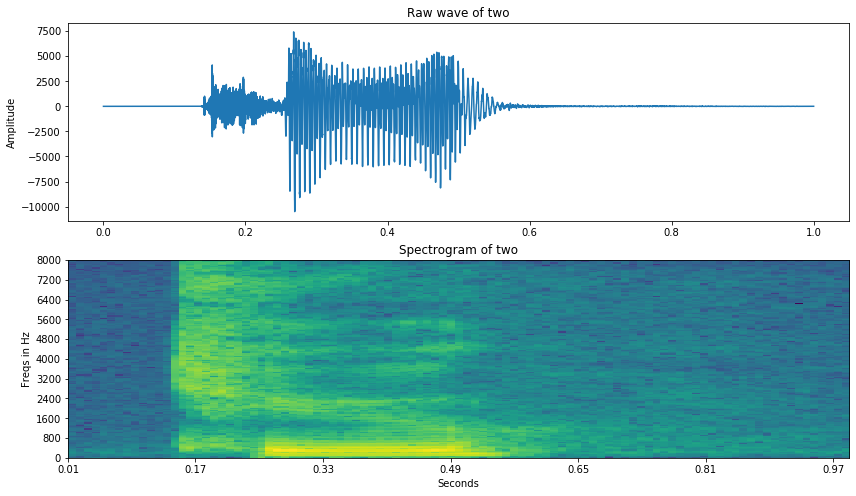

In [24]:
freqs, times, spectrogram = log_specgram(signals, fs)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of '+b)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, fs/len(signals), fs), signals)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of '+b)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

##### 4. Mel power spectrogram

In [0]:
import librosa
import librosa.display

In [0]:
y, sr = librosa.load(path)

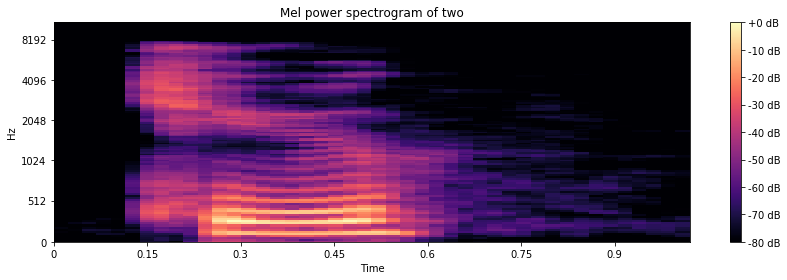

In [28]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram of '+b)
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()